In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
df = pd.read_csv("C:\\Inspire\\Task 1-2\\advertising_and_sales_clean.csv")
print(df.head())
print(df.info())
print(df.describe())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB
None
                  tv         radio  social_media          sales
count    4546.000000   4546.000000   4546.000000    4546.000000
mean    54062.912451  18157.533110   3323.472829  192413.332112


<Axes: xlabel='total_ad', ylabel='sales'>

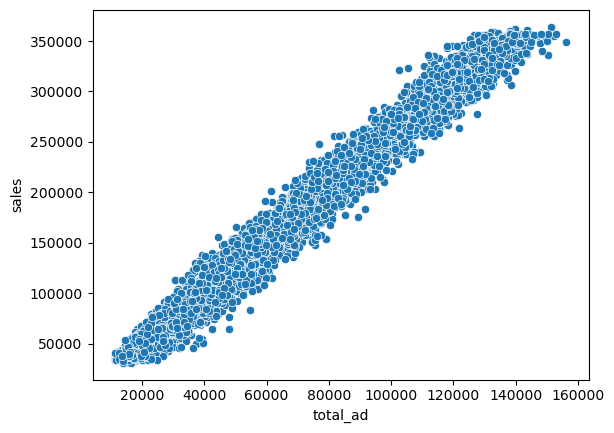

In [18]:
df['total_ad'] = df['tv'] + df['radio'] + df['social_media']

X = df[['total_ad']]
y = df['sales']

sns.scatterplot(x='total_ad', y='sales', data=df)


Slope: 3.561911951588215
Intercept: -168.9656163789623
R2 Score: 0.9990115565120982


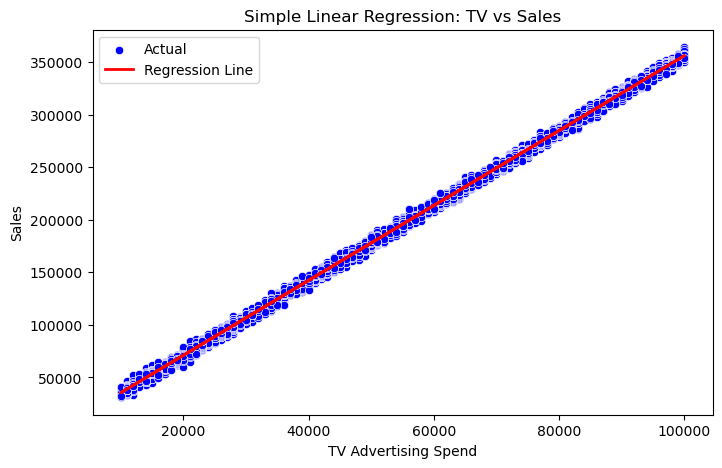

In [20]:
X = df[['tv']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R2 Score:", r2_score(y_test, y_pred))

# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='tv', y='sales', data=df, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Simple Linear Regression: TV vs Sales')
plt.legend()
plt.show()